In [13]:
import numpy as np
import pandas as pd
df=pd.read_excel('heatmap_data.xlsx')
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


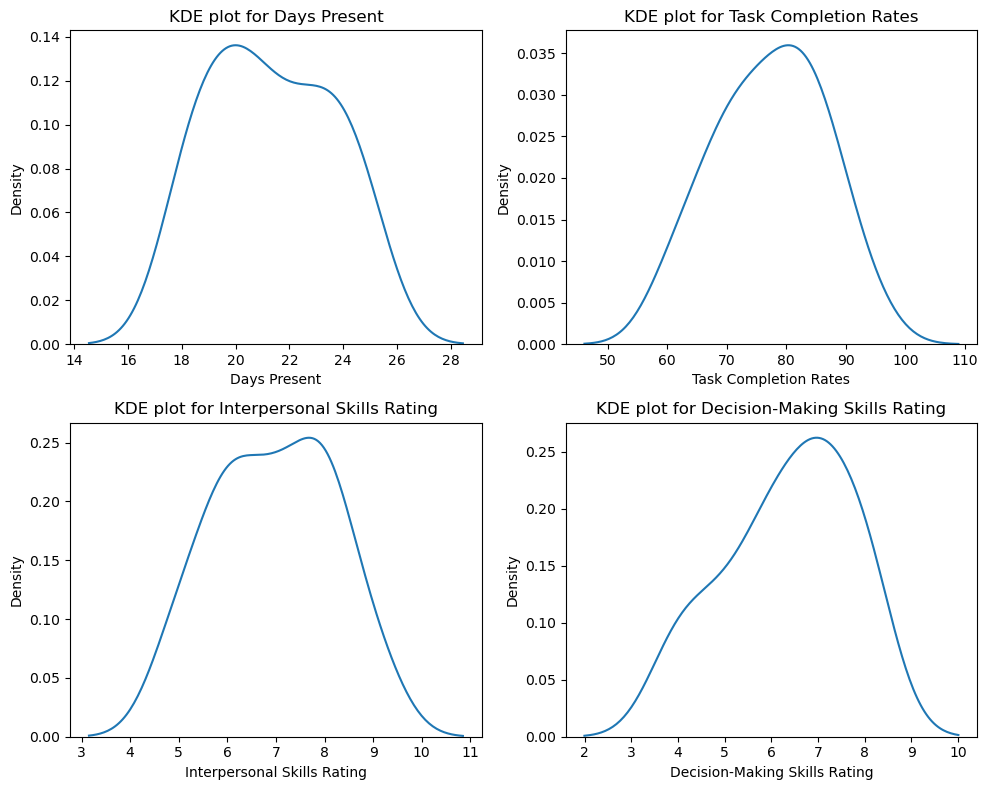

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Days Present','Task Completion Rates','Interpersonal Skills Rating','Decision-Making Skills Rating']  # Example column names
num_row, num_col = 2, 2  # Adjust based on number of plots

fig, axes = plt.subplots(num_row, num_col, figsize=(10, 8))  # Set appropriate figure size

# Flatten axes for easy iteration if needed
axes = axes.flatten()

for index, column in enumerate(numeric_columns):
    sns.kdeplot(df[column], ax=axes[index])
    axes[index].set_title(f'KDE plot for {column}')  # Dynamic titles

plt.tight_layout()
plt.show()

In [45]:
from scipy.stats import shapiro
import pandas as pd
numeric_columns =['Days Present','Task Completion Rates','Interpersonal Skills Rating','Decision-Making Skills Rating','Sales Revenue Generated']  # Selecting numerical columns
shapiro_results = {}

for column in numeric_columns:
    stat, p_value = shapiro(df[column])  # Perform Shapiro-Wilk test
    shapiro_results[column] = round(p_value, 3)  # Store rounded p-values

print(shapiro_results)  # Output results

{'Days Present': 0.044, 'Task Completion Rates': 0.321, 'Interpersonal Skills Rating': 0.015, 'Decision-Making Skills Rating': 0.004, 'Sales Revenue Generated': 0.12}


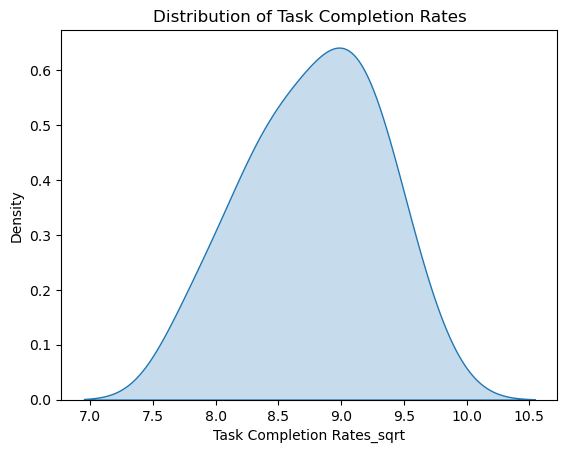

Axes(0.125,0.11;0.775x0.77)
p-value: 0.26458350826238264


In [29]:
from scipy.stats import shapiro
def sqrt_transformation(df, column_name):
    df[f'{column_name}_sqrt'] = np.sqrt(df[column_name])
    stat, p_value = shapiro(df[f'{column_name}_sqrt'])
    distribution = sns.kdeplot(df[f'{column_name}_sqrt'], fill=True)
    plt.title('Distribution of Task Completion Rates')
    plt.show()
    return distribution, p_value

# Call the function
distribution, p_value = sqrt_transformation(df, 'Task Completion Rates')
print(distribution)
print('p-value:',p_value)
 


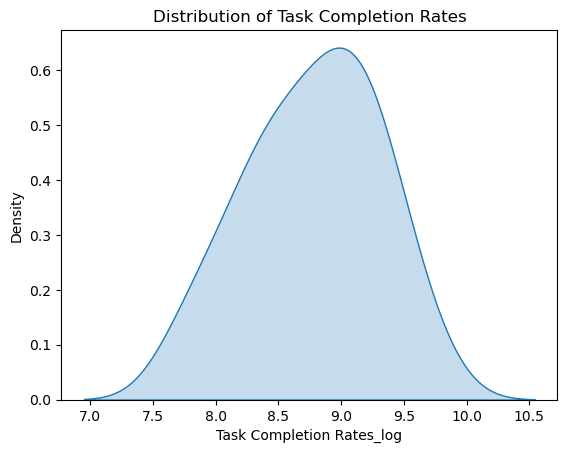

Axes(0.125,0.11;0.775x0.77)
p-value: 0.26458350826238264


In [33]:
def log_transformation(df, column_name):
    df[f'{column_name}_log'] = np.sqrt(df[column_name])
    stat, p_value = shapiro(df[f'{column_name}_log'])
    distribution = sns.kdeplot(df[f'{column_name}_log'], fill=True)
    plt.title('Distribution of Task Completion Rates')
    plt.show()
    return distribution, p_value

# Call the function
distribution, p_value = log_transformation(df, 'Task Completion Rates')
print(distribution)
print('p-value:',p_value)

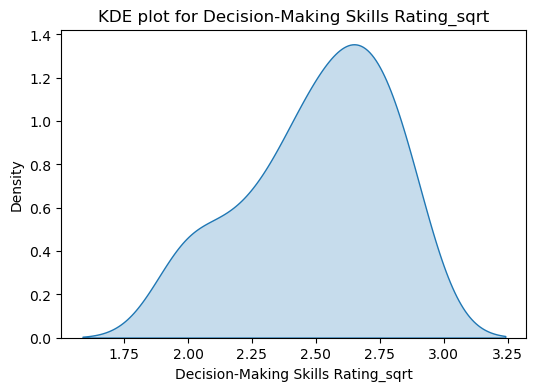

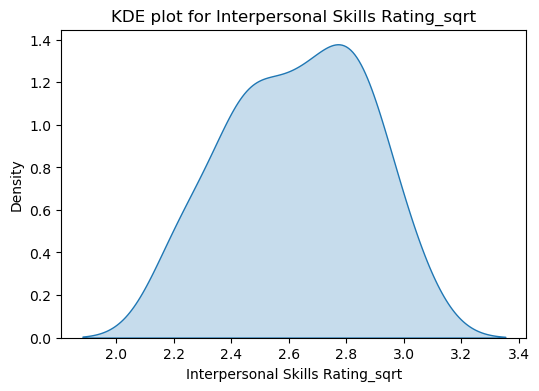

In [39]:
from scipy.stats import shapiro

# Function to apply square root transformation
def sqrt_transformation(df, column_name):
    df[f'{column_name}_sqrt'] = np.sqrt(df[column_name])  # Apply transformation
    
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(df[f'{column_name}_sqrt'])
    
    # Plot KDE for transformed data
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[f'{column_name}_sqrt'], fill=True)
    plt.title(f'KDE plot for {column_name}_sqrt')
    plt.xlabel(f'{column_name}_sqrt')
    plt.show()
sqrt_transformation(df, 'Decision-Making Skills Rating')
sqrt_transformation(df, 'Interpersonal Skills Rating')